<a href="https://colab.research.google.com/github/phoughton/ensign_multicat/blob/master/ensign_multicat_trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *


     |████████████████████████████████| 727kB 6.5MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 1.0MB 28.8MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 358kB 44.6MB/s 
     |████████████████████████████████| 40kB 5.4MB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
     |████████████████████████████████| 40kB 5.7MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 2.6MB 42.2MB/s 
Mounted at /content/gdrive


In [2]:
key = 'cbbc1294cd344cb1b5dda8dfb1522814'

In [3]:
image_types = 'jolly rogger','british','french', 'irish', 'netherlands', 'deutschland','scottish'
path = Path('flags')

In [4]:
if not path.exists():
    path.mkdir()
    for o in image_types:
        dest = (path/o.replace(' ', '_'))
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} flag')
        download_images(dest, urls=results.attrgot('content_url'))


 Download of https://cdn.wallpapersafari.com/31/51/ja8DKU.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p flags/scottish
$ cd flags/scottish
$ wget -c https://cdn.wallpapersafari.com/31/51/ja8DKU.jpg
$ tar xf ja8DKU.jpg
 And re-run your code once the download is successful


 Download of https://cdn.wallpapersafari.com/40/76/Pjm37X.png has failed after 5 retries
 Fix the download manually:
$ mkdir -p flags/scottish
$ cd flags/scottish
$ wget -c https://cdn.wallpapersafari.com/40/76/Pjm37X.png
$ tar xf Pjm37X.png
 And re-run your code once the download is successful



In [6]:
fns = get_image_files(path)
fns

(#1009) [Path('flags/deutschland/00000121.jpg'),Path('flags/deutschland/00000008.png'),Path('flags/deutschland/00000126.gif'),Path('flags/deutschland/00000123.png'),Path('flags/deutschland/00000071.jpg'),Path('flags/deutschland/00000117.jpg'),Path('flags/deutschland/00000111.png'),Path('flags/deutschland/00000144.png'),Path('flags/deutschland/00000122.png'),Path('flags/deutschland/00000118.jpg')...]

In [7]:
failed = verify_images(fns)
failed

(#26) [Path('flags/deutschland/00000065.jpg'),Path('flags/deutschland/00000053.jpg'),Path('flags/deutschland/00000077.png'),Path('flags/netherlands/00000128.jpg'),Path('flags/netherlands/00000081.jpg'),Path('flags/irish/00000038.jpg'),Path('flags/irish/00000026.jpg'),Path('flags/scottish/00000140.jpg'),Path('flags/scottish/00000036.jpg'),Path('flags/scottish/00000099.jpg')...]

In [12]:
failed.map(Path.unlink);


In [31]:
def parent_label_list(label):
  return [parent_label(label)]

In [40]:
flags = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label_list,
    item_tfms=Resize(128))

flags.summary(path)
path.ls()

Setting-up type transforms pipelines
Found 983 items
2 datasets of sizes 787,196
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label_list -> MultiCategorize -- {'vocab': None, 'sort': True, 'add_na': False} -> OneHotEncode -- {'c': None}

Building one sample
  Pipeline: PILBase.create
    starting from
      flags/deutschland/00000040.png
    applying PILBase.create gives
      PILImage mode=RGB size=1024x1024
  Pipeline: parent_label_list -> MultiCategorize -- {'vocab': None, 'sort': True, 'add_na': False} -> OneHotEncode -- {'c': None}
    starting from
      flags/deutschland/00000040.png
    applying parent_label_list gives
      [deutschland]
    applying MultiCategorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorMultiCategory([1])
    applying OneHotEncode -- {'c': None} gives
      TensorMultiCategory([0., 1., 0., 0., 0., 0., 0.])

Final sample: (PILImage mode=RGB size=1024x1024, TensorMultiCategory([0., 1., 0., 0., 0., 0., 0.]))


Sett

(#7) [Path('flags/deutschland'),Path('flags/netherlands'),Path('flags/irish'),Path('flags/scottish'),Path('flags/british'),Path('flags/french'),Path('flags/jolly_rogger')]

In [41]:
dls = flags.dataloaders(path)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


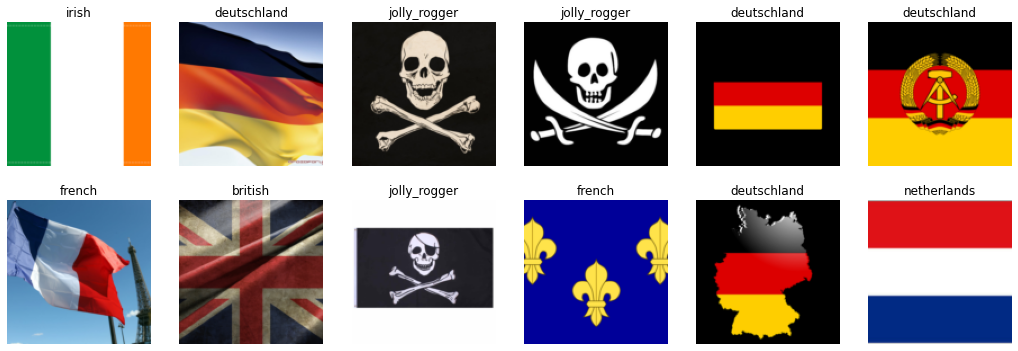

In [43]:
dls.valid.show_batch(max_n=12, nrows=2)

In [51]:
learn = cnn_learner(dls, resnet18, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.929483,0.539023,0.395044,00:25


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.638771,0.438948,0.435860,00:25
1,0.545385,0.312195,0.632653,00:26
2,0.465453,0.254547,0.737609,00:26
3,0.408669,0.241432,0.744898,00:25


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

In [49]:
learn.fit_one_cycle??

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


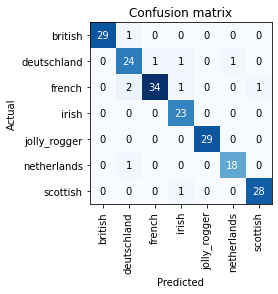

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export('flag_export.pkl')
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('flag_export.pkl')]